In [1]:
# Libraries

import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from datetime import date
from datetime import datetime
from datetime import timedelta

import os

# Export News into a CSV with Python

In [2]:
# Import packages
# Default packages
import time
import csv
import os
import json

# Preinstalled packages
import requests
import pandas

# Define desired work folder, where you want to save your .csv files
# Windows Example
os.chdir('C:/Users/PEGON/Desktop/mémoire/MEMOIREPROPRE/data/sentimental_media')

# URL of our News API
base_url = 'https://api.newscatcherapi.com/v2/search'

# Your API key
X_API_KEY = 'obIvRKRVrJiJUDhzW4667uAt70ffQCbWp2m29rlZddo'

In [3]:
# Put your API key to headers in order to be authorized to perform a call
headers = {'x-api-key': X_API_KEY}

# Define your desired parameters
params = {
    'q': 'Bitcoin',
    'lang': 'en',
    'to_rank': 10000,
    'page_size': 100,
    'page': 5
    }

# Make a simple call with both headers and params
response = requests.get(base_url, headers=headers, params=params)

# Encode received results
results = json.loads(response.text.encode())
if response.status_code == 200:
    print('Done')
else:
    print(results)
    print('ERROR: API call failed.')

Done


In [4]:
# Import data into pandas
pandas_table = pd.DataFrame(results['articles'])
pandas_table

,title,author,published_date,published_date_precision,link,clean_url,excerpt,summary,rights,rank,topic,country,language,authors,media,is_opinion,twitter_account,_score,_id
0,Historical Bitcoin Price Trends Are Traditiona...,Republished Plato,2022-09-17 17:30:49,full,https://news.bitcoin.com/historical-bitcoin-pr...,bitcoin.com,Half of September has passed and bitcoin trade...,Half of September has passed and bitcoin trade...,zephyrnet.com,2406,news,KN,en,"Jamie Redman,Open-Source Code,Republished Plato",https://cdn.zephyrnet.com/wp-content/uploads/2...,False,@plato_data,8.205976,6416a404c3934b88b1e7c18f56ad6ad2
1,Why This Bear Market Is Especially Bullish,Bitcoin Magazine,2022-09-23 07:00:00,full,https://bitcoinmagazine.com/business/why-this-...,bitcoinmagazine.com,"Hash rate hit an all-time high, miners seem to...",This is a transcribed excerpt of the 'Bitcoin ...,bitcoinmagazine.com,6284,news,US,en,Bitcoin Magazine,https://bitcoinmagazine.com/.image/t_share/MTg...,False,None,8.204645,9512d3de70c5f9cd5b84903636ff3684
2,BITCOIN LAST DOWN 5% AT THREE-MONTH LOW OF $18...,MarketScreener,2022-09-19 06:01:25,full,https://www.marketscreener.com/news/latest/BIT...,marketscreener.com,BITCOIN LAST DOWN 5% AT THREE-MONTH LOW OF $18...,BITCOIN LAST DOWN 5% AT THREE-MONTH LOW OF $18...,Copyright 2001 - 2022 Surperformance,3681,finance,US,en,MarketScreener,https://www.marketscreener.com/images/twitter_...,False,@ForTraders,8.200068,1bdccbabd286fe4853dc8792d2ed4f6b
3,EQONEX expands its Investment Product offering...,PRNewswire,2022-09-16 00:00:00,date,https://www.wbtv.com/prnewswire/2022/09/16/eqo...,wbtv.com,USD tranche of EQONEX Bitcoin Exchange Traded ...,USD tranche of EQONEX Bitcoin Exchange Traded ...,wbtv.com,8181,news,US,en,PRNewswire,https://www.wbtv.com/pf/resources/images/logo-...,False,@WBTV_News,8.196281,34d0e1535a3a27d017624d48edad9d95
4,How is Bitcoin becoming Beneficial in Differen...,,2022-09-21 13:56:42,full,http://www.tmcnet.com/topics/articles/2022/09/...,tmcnet.com,None,"When it comes to the Australian economy, bitco...",tmcnet.com,3900,tech,US,en,,https://images.tmcnet.com/tmc/misc/articles/im...,False,None,8.195197,1c9fe32045a20d780204e08df8b5acb2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Nasdaq To Launch Institutional Bitcoin, Crypto...",Namcios,2022-09-20 12:37:23,full,https://bitcoinmagazine.com/markets/nasdaq-to-...,bitcoinmagazine.com,The exchange is set to enter the crowded marke...,The Nasdaq is seeking to offer custody service...,bitcoinmagazine.com,6284,news,US,en,Namcios,https://bitcoinmagazine.com/.image/t_share/MTg...,False,@namcios,8.015313,39dc7999842e3a9a02edd4672fbceeff
96,"Cryptocurrencies Price Prediction: Bitcoin, Et...",,2022-09-19 13:00:00,timezone unknown,https://www.fxstreet.com/cryptocurrencies/news...,fxstreet.com,Bitcoin price has single-handedly crashed the ...,Bitcoin price has single-handedly crashed the ...,fxstreet.com,7502,news,ES,en,,https://editorial.fxstreet.com/images/Markets/...,False,@FXStreetUpdate,8.013322,ad777053b8bc6bfefc73f5ffb3c130d2
97,Salvadoran Businesses Omit Bitcoin From Their ...,DailyCoin,2022-09-16 08:13:00,full,https://www.investing.com/news/cryptocurrency-...,investing.com,Salvadoran Businesses Omit Bitcoin From Their ...,© Reuters Salvadoran Businesses Omit Bitcoin F...,investing.com,1372,news,ES,en,DailyCoin,https://i-invdn-com.investing.com/news/moved_L...,False,@investingcom,8.012654,949c0c406a56076d9ebe0a194b556d9e
98,"Bitcoin Open Interest, Funding Rates Point To ...",,2022-09-16 23:00:08,full,https://www.newsbtc.com/news/bitcoin/bitcoin-o...,newsbtc.com,Bitcoin has seen fluctuating sentiment lately....,Bitcoin has seen fluctuating sentiment lately....,newsbtc.com,8460,news,GB,en,,https://www.newsbtc.com/wp-content/uploads/202...,False,@newsbtc,8.012405,ea2736ad2330ab81448ff88b24166911


In [5]:
# Variable to store all found news articles
all_news_articles = []

# Ensure that we start from page 1
params['page'] = 1

# Infinite loop which ends when all articles are extracted
while True:

    # Wait for 1 second between each call
    time.sleep(1)

    # GET Call from previous section enriched with some logs
    response = requests.get(base_url, headers=headers, params=params)
    results = json.loads(response.text.encode())
    if response.status_code == 200:
        print(f'Done for page number => {params["page"]}')


        # Adding your parameters to each result to be able to explore afterwards
        for i in results['articles']:
            i['used_params'] = str(params)


        # Storing all found articles
        all_news_articles.extend(results['articles'])

        # Ensuring to cover all pages by incrementing "page" value at each iteration
        params['page'] += 1
        if params['page'] > results['total_pages']:
            print("All articles have been extracted")
            break
        else:
            print(f'Proceed extracting page number => {params["page"]}')
    else:
        print(results)
        print(f'ERROR: API call failed for page number => {params["page"]}')
        break

print(f'Number of extracted articles => {str(len(all_news_articles))}')

Done for page number => 1
Proceed extracting page number => 2
Done for page number => 2
Proceed extracting page number => 3
Done for page number => 3
Proceed extracting page number => 4
Done for page number => 4
Proceed extracting page number => 5
Done for page number => 5
Proceed extracting page number => 6
Done for page number => 6
Proceed extracting page number => 7
Done for page number => 7
Proceed extracting page number => 8
Done for page number => 8
Proceed extracting page number => 9
Done for page number => 9
Proceed extracting page number => 10
Done for page number => 10
Proceed extracting page number => 11
Done for page number => 11
Proceed extracting page number => 12
Done for page number => 12
Proceed extracting page number => 13
Done for page number => 13
Proceed extracting page number => 14
Done for page number => 14
Proceed extracting page number => 15
Done for page number => 15
Proceed extracting page number => 16
Done for page number => 16
Proceed extracting page number

In [6]:
field_names = list(all_news_articles[0].keys())
# Generate CSV file from dict
#with open('extracted_news_articles.csv', 'w', encoding="utf-8", newline='') as csvfile:
    #writer = csv.DictWriter(csvfile, fieldnames=field_names, delimiter=";")
    #writer.writeheader()
    #writer.writerows(all_news_articles)

In [7]:
# Generate CSV from Pandas table
# Create Pandas table
#pandas_table = pd.DataFrame(all_news_articles)

# Generate CSV
#pandas_table.to_csv('extracted_news_articles.csv', encoding='utf-8', sep=';')

# **SENTIMENTAL ANALYSIS**

In [8]:
df = pd.read_csv(r'extracted_news_articles.csv', sep=";")
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Link,Headline,Description
2022-09-21,21/09/2022,https://www.makeuseof.com/what-is-bitcoin-futu...,What Is a Bitcoin Futures ETF? How Does It Dif...,There is a long-standing struggle to create a ...
2022-09-19,19/09/2022,https://www.prnewswire.com/news-releases/thndr...,THNDR Games Launches New Bitcoin Game to Bring...,"THNDR releases Club Bitcoin, a Solitaire-style..."
2022-09-20,20/09/2022,https://news.yahoo.com/best-bitcoin-casino-ind...,Best Bitcoin Casino India 2022 Betbeard,"Mumbai, India --News Direct-- BetBeard\n\nBetb..."
2022-09-21,21/09/2022,https://cointelegraph.com/news/raising-a-glass...,Raising a glass to Satoshi's Place and the cha...,Cointelegraph took a trip to Satoshi's Place o...
2022-09-20,20/09/2022,https://www.benzinga.com/content/28931898/best...,Best Bitcoin Casino India 2022 Betbeard,"Mumbai, India\n--News Direct--\nBetbeard is th..."
...,...,...,...,...
2022-09-20,20/09/2022,https://finance.yahoo.com/news/singapore-mni-t...,Singapore MNI Technology Launched the Meta Pla...,"Singapore, Sept. 20, 2022 (GLOBE NEWSWIRE) -- ..."
2022-09-19,19/09/2022,https://www.hindawi.com/journals/misy/2022/870...,Development of an Efficient and Secured E-Voti...,"Smart technologies, particularly the developme..."
2022-09-20,20/09/2022,https://www.resetera.com/threads/streamer-trai...,Streamer Trainwrecks has supposedly given Twit...,More and more wild shit happening. Mods might ...
2022-09-19,19/09/2022,https://www.bloomberg.com/news/videos/2022-09-...,'Bloomberg Markets: China Open' Full Show (09/...,CC-Transcript\n\nClose\n\n00:00Good Monday mor...


In [9]:
# Creation function to get the polarity 

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create one new column on df
df['Polarity'] = df['Headline'].apply(getPolarity)

df.head(5)

,Date,Link,Headline,Description,Polarity
2022-09-21,21/09/2022,https://www.makeuseof.com/what-is-bitcoin-futu...,What Is a Bitcoin Futures ETF? How Does It Dif...,There is a long-standing struggle to create a ...,0.000000
2022-09-19,19/09/2022,https://www.prnewswire.com/news-releases/thndr...,THNDR Games Launches New Bitcoin Game to Bring...,"THNDR releases Club Bitcoin, a Solitaire-style...",-0.131818
2022-09-20,20/09/2022,https://news.yahoo.com/best-bitcoin-casino-ind...,Best Bitcoin Casino India 2022 Betbeard,"Mumbai, India --News Direct-- BetBeard\n\nBetb...",1.000000
2022-09-21,21/09/2022,https://cointelegraph.com/news/raising-a-glass...,Raising a glass to Satoshi's Place and the cha...,Cointelegraph took a trip to Satoshi's Place o...,0.000000
2022-09-20,20/09/2022,https://www.benzinga.com/content/28931898/best...,Best Bitcoin Casino India 2022 Betbeard,"Mumbai, India\n--News Direct--\nBetbeard is th...",1.000000


In [10]:
# Create a function to compute negative, neutral & positive sentiments 
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Create one new column on df
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Date,Link,Headline,Description,Polarity,Sentiment
2022-09-21,21/09/2022,https://www.makeuseof.com/what-is-bitcoin-futu...,What Is a Bitcoin Futures ETF? How Does It Dif...,There is a long-standing struggle to create a ...,0.000000,Neutral
2022-09-19,19/09/2022,https://www.prnewswire.com/news-releases/thndr...,THNDR Games Launches New Bitcoin Game to Bring...,"THNDR releases Club Bitcoin, a Solitaire-style...",-0.131818,Negative
2022-09-20,20/09/2022,https://news.yahoo.com/best-bitcoin-casino-ind...,Best Bitcoin Casino India 2022 Betbeard,"Mumbai, India --News Direct-- BetBeard\n\nBetb...",1.000000,Positive
2022-09-21,21/09/2022,https://cointelegraph.com/news/raising-a-glass...,Raising a glass to Satoshi's Place and the cha...,Cointelegraph took a trip to Satoshi's Place o...,0.000000,Neutral
2022-09-20,20/09/2022,https://www.benzinga.com/content/28931898/best...,Best Bitcoin Casino India 2022 Betbeard,"Mumbai, India\n--News Direct--\nBetbeard is th...",1.000000,Positive
2022-09-20,20/09/2022,https://www.benzinga.com/markets/cryptocurrenc...,MicroStrategy Bought The Bitcoin Dip Again: He...,One of the most vocal supporters of leading cr...,0.200000,Positive
2022-09-19,19/09/2022,https://www.globenewswire.com/news-release/202...,Global Bitcoin Market Report (2022 to 2030),"Dublin, Sept. 19, 2022 (GLOBE NEWSWIRE) -- The...",0.000000,Neutral
2022-09-20,20/09/2022,https://bitcoinmagazine.com/business/importanc...,The Importance Of Keeping Bitcoin Adoption Local,"This is an opinion editorial by Doug, founder ...",0.000000,Neutral
2022-09-20,20/09/2022,https://cointelegraph.com/news/michael-saylor-...,Michael Saylor can't stop: MicroStrategy now h...,MicroStrategy owns 0.62% of all the Bitcoin (B...,0.000000,Neutral
2022-09-22,22/09/2022,https://www.reddit.com/r/Bitcoin/comments/xl8u...,Internet Archive's Bitcoin Address : Bitcoin,Bitcoin is the currency of the Internet: a dis...,0.000000,Neutral


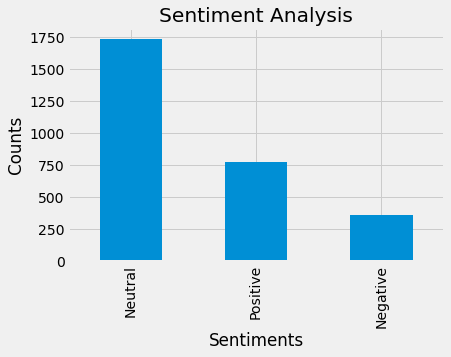

In [11]:
# Plot & viz the sentiment count 

plt.title('Sentiment Analysis')
df['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')

plt.show()

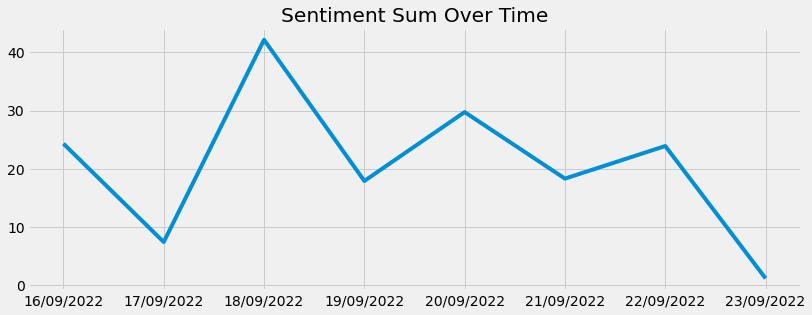

In [12]:
# Plot the sum of the polarity for each date

plt.figure(figsize=(12.33,4.5))
plt.title('Sentiment Sum Over Time')
polarity = df.groupby(['Date']).sum()['Polarity']
plt.plot(polarity.index, polarity)

In [13]:
polarity

Date
16/09/2022    24.313733
17/09/2022     7.430692
18/09/2022    42.143409
19/09/2022    17.911981
20/09/2022    29.733984
21/09/2022    18.313855
22/09/2022    23.909275
23/09/2022     1.191667
Name: Polarity, dtype: float64

In [14]:
# Get the count of each article per date 
polarity_count = df.groupby(['Date']).count()['Polarity']

polarity_count

Date
16/09/2022    491
17/09/2022    179
18/09/2022    224
19/09/2022    494
20/09/2022    470
21/09/2022    572
22/09/2022    429
23/09/2022     13
Name: Polarity, dtype: int64

In [15]:
# Average sentiment for each day over time
polarity_avg = polarity / polarity_count
polarity_avg

Date
16/09/2022    0.049519
17/09/2022    0.041512
18/09/2022    0.188140
19/09/2022    0.036259
20/09/2022    0.063264
21/09/2022    0.032017
22/09/2022    0.055733
23/09/2022    0.091667
Name: Polarity, dtype: float64

In [19]:
# FINAL DF DATE/SENTIMENT/VALUE 

pol = pd.DataFrame(polarity_avg)

# Create a function to compute negative, neutral & positive sentiments 
def getSentiments(score):
    if score <= 0.04:
        return 'Positive --'
    elif score <= 0.05:
        return 'Positive -'
    elif score <= 0.07:
        return 'Positive +'        
    else:
        return 'Positive ++'

# Weighted Sentiments

def getValues(score):
    if score <= 0.04:
        return -3
    elif score <= 0.05:
        return -2
    elif score <= 0.06:
        return 1
    elif score <= 0.08:
        return 2
    elif score <= 0.10:
        return 3
    elif score <= 0.15:
        return 5                   
    else:
        return 7

# Create one new column on df
pol['Sentiment'] = pol['Polarity'].apply(getSentiments)
pol['Value'] = pol['Polarity'].apply(getValues)
pol = pol.iloc[: , 1:]
pol = pol.reset_index(inplace=False)
pol = pol.sort_values(by=['Date'], ascending=True)

pol

,Date,Sentiment,Value
0,16/09/2022,Positive -,-2
1,17/09/2022,Positive -,-2
2,18/09/2022,Positive ++,7
3,19/09/2022,Positive --,-3
4,20/09/2022,Positive +,2
5,21/09/2022,Positive --,-3
6,22/09/2022,Positive +,1
7,23/09/2022,Positive ++,3


In [20]:
import plotly.express as px

df = pol
fig = px.bar(df, x='Date', y='Value', color="Sentiment", title="Sentimental Value Over Time")
fig.show()

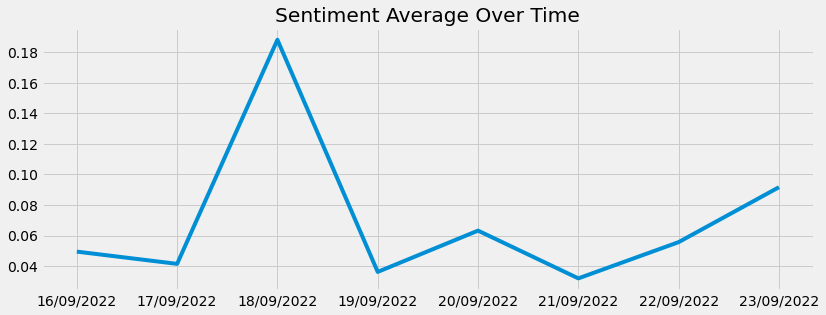

In [21]:
# Plot the average sentiment over time

plt.figure(figsize=(12.33,4.5))
plt.title('Sentiment Average Over Time')
plt.plot(polarity_avg.index, polarity_avg)